In [31]:
from keras.preprocessing.image import ImageDataGenerator

In [32]:
datagen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

In [33]:
train_gen = datagen.flow_from_directory('dogscats/train/',
                                        target_size = (150, 150),
                                        batch_size = 256,
                                       )

Found 23000 images belonging to 2 classes.


In [34]:
val_gen = datagen.flow_from_directory('dogscats/valid/',
                                      target_size = (150, 150),
                                      batch_size = 256
                                       )

Found 2000 images belonging to 2 classes.


In [35]:
from matplotlib import pyplot as plt

In [36]:
images_batch = next(train_gen)[0]

In [37]:
images_batch.shape

(256, 150, 150, 3)

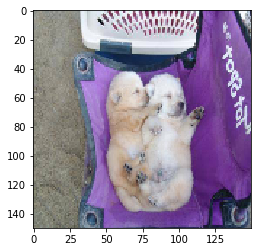

In [38]:
plt.imshow(images_batch[10])
plt.show()

# Con capas densas

In [39]:
from keras.models import Sequential
from keras.layers import Dense, Flatten

In [40]:
model = Sequential()
model.add(Flatten(input_shape=(150,150,3)))
model.add(Dense(2, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 67500)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 135002    
Total params: 135,002
Trainable params: 135,002
Non-trainable params: 0
_________________________________________________________________


In [41]:
from keras.optimizers import Adam

In [42]:
opt = Adam()
model.compile('adam', loss='binary_crossentropy', metrics=['accuracy'])

In [43]:
model.fit_generator(train_gen, epochs=5, validation_data=val_gen)

Epoch 1/5
90/90 [==============================] - 78s 870ms/step - loss: 7.9762 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 2/5
90/90 [==============================] - 72s 798ms/step - loss: 8.0588 - acc: 0.5000 - val_loss: 8.0583 - val_acc: 0.5000
Epoch 3/5
90/90 [==============================] - 72s 801ms/step - loss: 7.9771 - acc: 0.5014 - val_loss: 8.0151 - val_acc: 0.5000
Epoch 4/5
90/90 [==============================] - 72s 800ms/step - loss: 8.0158 - acc: 0.5000 - val_loss: 8.0151 - val_acc: 0.5000
Epoch 5/5
90/90 [==============================] - 72s 802ms/step - loss: 8.0152 - acc: 0.5000 - val_loss: 8.0151 - val_acc: 0.5000


# Con convolucionales

In [44]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Activation

In [49]:
model = Sequential()
model.add(Conv2D(16, 3, input_shape=(150,150,3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(2))

model.add(Conv2D(32, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(2))

model.add(Conv2D(64, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(2))

model.add(Flatten()) 
model.add(Activation('relu'))
model.add(Dense(2))
model.add(Activation('sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 150, 150, 16)      448       
_________________________________________________________________
activation_11 (Activation)   (None, 150, 150, 16)      0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 73, 73, 32)        4640      
_________________________________________________________________
activation_12 (Activation)   (None, 73, 73, 32)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 34, 34, 64)        18496     
__________

In [50]:
opt = Adam()
model.compile('adam', loss='binary_crossentropy', metrics=['accuracy'])

In [51]:
model.fit_generator(train_gen, epochs=50, validation_data=val_gen)

Epoch 1/50
90/90 [==============================] - 78s 870ms/step - loss: 0.6199 - acc: 0.6365 - val_loss: 0.5302 - val_acc: 0.7230
Epoch 2/50
90/90 [==============================] - 72s 800ms/step - loss: 0.5123 - acc: 0.7464 - val_loss: 0.4976 - val_acc: 0.7482
Epoch 3/50
90/90 [==============================] - 72s 802ms/step - loss: 0.4744 - acc: 0.7746 - val_loss: 0.4643 - val_acc: 0.7807
Epoch 4/50
90/90 [==============================] - 73s 806ms/step - loss: 0.4488 - acc: 0.7949 - val_loss: 0.4421 - val_acc: 0.7880
Epoch 5/50
90/90 [==============================] - 72s 803ms/step - loss: 0.4273 - acc: 0.8023 - val_loss: 0.4228 - val_acc: 0.8035
Epoch 6/50
90/90 [==============================] - 72s 801ms/step - loss: 0.4120 - acc: 0.8166 - val_loss: 0.3964 - val_acc: 0.8235
Epoch 7/50
90/90 [==============================] - 72s 804ms/step - loss: 0.4006 - acc: 0.8227 - val_loss: 0.4150 - val_acc: 0.8088
Epoch 8/50
90/90 [==============================] - 72s 803ms/step - 

In [52]:
model.save('cnn-50-epochs.hdf5')

In [57]:
from matplotlib import pyplot as plt

In [ ]:
model.history.history['tr']

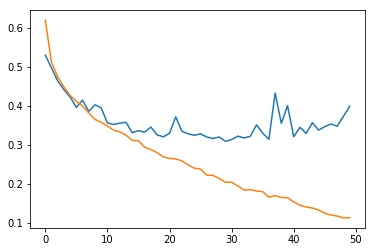

In [61]:
plt.plot(model.history.history['val_loss'])
plt.plot(model.history.history['loss'])
plt.show()

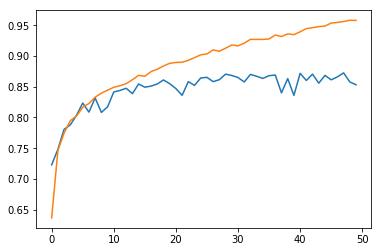

In [62]:
plt.plot(model.history.history['val_acc'])
plt.plot(model.history.history['acc'])
plt.show()

In [64]:
import numpy as np
np.save('history_50_epochs',model.history.history)